## Task 1: Credit Card Routing for Online Purchase via Predictive Modelling

### Problem statement
* Over the past year, the online payment department at a large retail company have encountered a high failure rate of online credit card payments done via so-called payment service providers, referred to as PSP's by the business stakeholders.
* The company losses alot of money due to failed transactions and customers have become increasingly unsatisfied with the online shop.
* The current routing logic is manual and rule-based. Business decision makers hope that with predictive modelling, a smarter way of routing a PSP to a transaction is possible.

### Data Science Task
* Help the business to automate the credit card routing via a predictive model
* Such a model should increase the payment success rate by finding the best possible PSP for each transaction and at the same time keep the transaction fees low.

# PART 5a: Evaluation and Model Selection

### CRISP-DM (5) - Evaluation (Comparing model metrics)
* Compare the metrics of the different models
* Choose a final model

### Import Key Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook 
from bokeh.palettes import Spectral
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show

### Read Dataset

In [3]:
auc_eval = pd.read_excel("Models' Performance.xlsx", "AUC")
time_eval = pd.read_excel("Models' Performance.xlsx", "Time in secs")

In [4]:
auc_eval

,Model,AT,WDT,DTIDRF,DTEDRF,DTIDRFDO,DTEDRFDO
0,Base Model,0.62407,0.62407,0.62407,0.62407,0.62407,0.62407
1,LR,0.62548,0.62751,0.62478,0.62770,0.62478,0.62771
2,KNN,0.58253,0.59097,0.58505,0.58081,0.58668,0.58697
3,SVM,0.52495,0.43316,0.46918,0.57379,0.49561,0.51641
4,KSVM,0.54717,0.57321,0.59940,0.57836,0.57662,0.60082
5,NB,0.61451,0.62230,0.61124,0.62184,0.61108,0.62149
6,DTC,0.53765,0.54675,0.53454,0.54370,0.53613,0.54916
7,RFC,0.59330,0.60346,0.61161,0.62378,0.60740,0.62414
8,XGB,0.65657,0.65723,0.66452,0.65781,0.66480,0.65906


In [5]:
# unpivot the table
auc_unpivot = pd.melt(auc_eval, id_vars = 'Model', value_vars = ['AT', 'WDT', 'DTIDRF', 'DTEDRF', 'DTIDRFDO', 'DTEDRFDO']) 

In [6]:
auc_unpivot.head(1)

,Model,variable,value
0,Base Model,AT,0.62407


In [7]:
auc_unpivot.rename(columns={'variable':'Scenario', 'value':'AUC'}, inplace=True)

In [8]:
auc_unpivot.head(1)

,Model,Scenario,AUC
0,Base Model,AT,0.62407


### Create Line Graph

In [9]:
def line_ordered(df, x, y, legend, title, color='#00B8D4', v_nrows=2, v_ncols=1, v_figsize=(10, 3), v_ylim=0, leg_pos=(0.95,0.55)):
    # plot day of month against country with sum (All) - separated by monthvv
    plt.figure(figsize=v_figsize)
    sns.lineplot(x=x, y=y, color= color, data=df, hue=legend)
    plt.legend(loc='upper right', fontsize=8, bbox_to_anchor=leg_pos)
    plt.ylim(v_ylim,None)
    plt.title(title)
    plt.tight_layout()
    plt.show()

### 5i. Visualize AUC

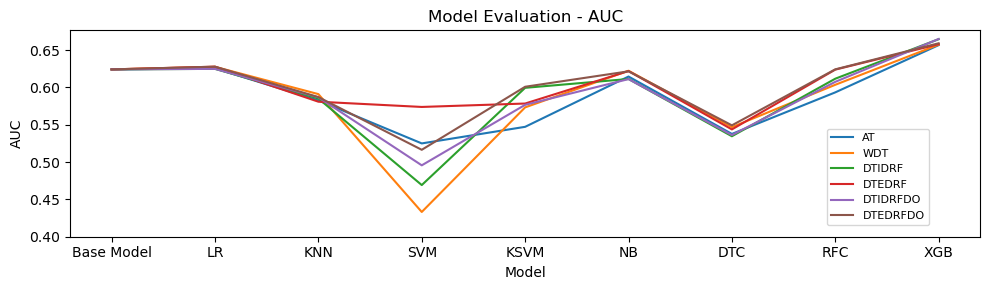

In [10]:
line_ordered(auc_unpivot, 'Model', 'AUC', 'Scenario', 'Model Evaluation - AUC', v_ylim=0.4)

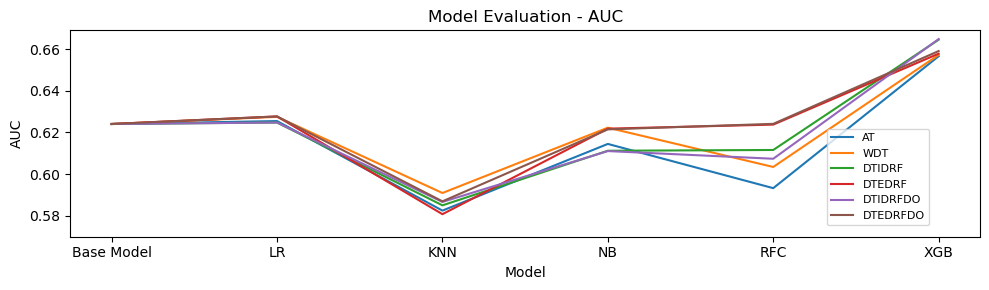

In [11]:
## Remove SVM, KSVM, DTC, and KNN to see performance of the other models more clearly
auc_unpivot_filtered = auc_unpivot[(auc_unpivot['Model'] != 'SVM') & (auc_unpivot['Model'] != 'KSVM') & (auc_unpivot['Model'] != 'DTC')]
line_ordered(auc_unpivot_filtered, 'Model', 'AUC', 'Scenario', 'Model Evaluation - AUC', v_figsize=(10, 3), v_ylim=0.57)

In [12]:
#auc_unpivot_filtered = auc_unpivot[(auc_unpivot['Model'] != 'SVM') & (auc_unpivot['Model'] != 'KSVM') & (auc_unpivot['Model'] != 'DTC') 
#& (auc_unpivot['Model'] != 'KNN')]

### 5ii. Visualize Time

In [13]:
time_eval

,Model,AT,WDT,DTIDRF,DTEDRF,DTIDRFDO,DTEDRFDO
0,LR,0.0287,0.0237,0.0471,0.0434,0.0355,0.0498
1,KNN,0.2421,0.1846,0.0000,0.0060,0.0156,0.0040
2,SVM,27.7834,16.0120,36.3881,22.5819,40.9362,46.0767
3,KSVM,209.0362,84.6470,81.0613,244.6601,267.1120,86.1409
4,NB,0.0228,0.0123,0.0182,0.0132,0.0182,0.0134
5,DTC,0.1430,0.1201,0.2818,0.2120,0.3867,0.3242
6,RFC,0.5485,0.3851,0.9643,0.7839,0.8822,0.7751
7,XGB,0.2527,0.1801,0.2347,0.2159,0.2462,0.2550


In [14]:
# unpivot the table
time_unpivot = pd.melt(time_eval, id_vars = 'Model', value_vars = ['AT', 'WDT', 'DTIDRF', 'DTEDRF', 'DTIDRFDO', 'DTEDRFDO']) 

In [15]:
time_unpivot.head(1)

,Model,variable,value
0,LR,AT,0.0287


In [16]:
time_unpivot.rename(columns={'variable':'Scenario', 'value':'Time (seconds)'}, inplace=True)

In [17]:
time_unpivot.head()

,Model,Scenario,Time (seconds)
0,LR,AT,0.0287
1,KNN,AT,0.2421
2,SVM,AT,27.7834
3,KSVM,AT,209.0362
4,NB,AT,0.0228


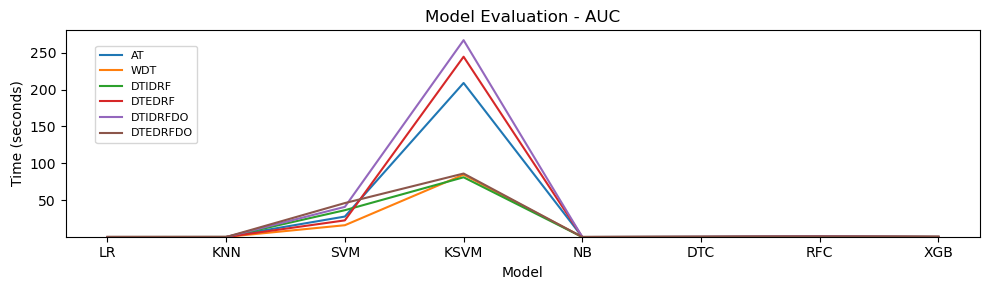

In [18]:
line_ordered(time_unpivot, 'Model', 'Time (seconds)', 'Scenario', 'Model Evaluation - AUC', v_ylim=0.4, leg_pos=(0.15,0.95))

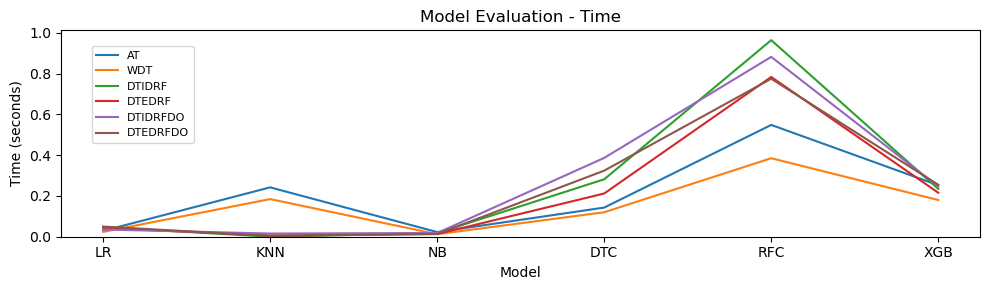

In [19]:
## Remove SVM and KSVM to see performance of the other models more clearly
time_unpivot_filtered = time_unpivot[(time_unpivot['Model'] != 'SVM') & (time_unpivot['Model'] != 'KSVM')]
line_ordered(time_unpivot_filtered, 'Model', 'Time (seconds)', 'Scenario', 'Model Evaluation - Time', v_figsize=(10, 3), v_ylim=0,  leg_pos=(0.15,0.95))

### Refining the selected model
* Based on the analysis of the metrics above as detailed in the report, the XGB Model has the highest performance and this is with the DTIDRFDO dataset scenario
* However, since the DTIDRFDO is consistently low, we will assess the 3 highest performing XGBOOST scenarios (DTEDRF, DTIDRFDO, and DTEDRFDO) using K-fold cross validation
* We will then use Grid Search to choose the optimal hyperparameters for the XGBoost model
* Refer back to Part 4h for the XGBoost k-fold cross validation and continue to Part 5b for the model optimization procedures and feature importance